In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feature=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [4]:
# load data
data  = pd.read_csv('heart+disease/processed.hungarian.data', sep=",",names=feature)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [6]:
data.shape

(294, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestbps    294 non-null object
chol        294 non-null object
fbs         294 non-null object
restecg     294 non-null object
thalach     294 non-null object
exang       294 non-null object
oldpeak     294 non-null float64
slope       294 non-null object
ca          294 non-null object
thal        294 non-null object
target      294 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [8]:
data = data.replace({'?':np.NaN})

In [9]:
del data['slope']
del data['ca']
del data['thal']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestbps    293 non-null object
chol        271 non-null object
fbs         286 non-null object
restecg     293 non-null object
thalach     293 non-null object
exang       293 non-null object
oldpeak     294 non-null float64
target      294 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 25.4+ KB


In [11]:
data = data.dropna()
#data = data.fillna(data.mean())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
age         261 non-null int64
sex         261 non-null int64
cp          261 non-null int64
trestbps    261 non-null object
chol        261 non-null object
fbs         261 non-null object
restecg     261 non-null object
thalach     261 non-null object
exang       261 non-null object
oldpeak     261 non-null float64
target      261 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 24.5+ KB


In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


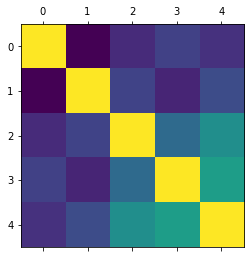

In [14]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

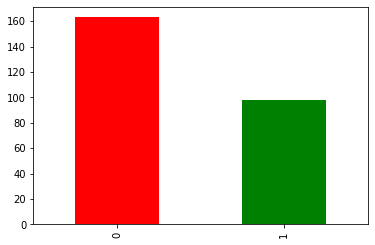

In [15]:
data.target.value_counts().plot(kind='bar',color=['red','green']);

In [16]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['trestbps']= label_encoder.fit_transform(data['trestbps'])
data['chol']= label_encoder.fit_transform(data['chol'])
data['fbs']= label_encoder.fit_transform(data['fbs'])
data['restecg']= label_encoder.fit_transform(data['restecg'])
data['thalach']= label_encoder.fit_transform(data['thalach'])
data['exang']= label_encoder.fit_transform(data['exang'])

In [17]:
data.to_csv('hungarian_processed.csv')

In [18]:
X = data.drop(["target"],axis =1)
y = data["target"]

In [19]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
from imblearn.metrics import specificity_score, sensitivity_score

In [21]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=42)

In [22]:
X_train.shape

(234, 10)

In [23]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
spec = []
sens = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    spec.append(round(e,3))
    sens.append(round(f,3))

In [67]:
ML_Model1 = []
accuracy1 = []
precision1 = []
recall1 = []
f1score1 = []
spec1 = []
sens1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d,e,f):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    precision1.append(round(b, 3))
    recall1.append(round(c, 3))
    f1score1.append(round(d, 3))
    spec1.append(round(e,3))
    sens1.append(round(f,3))

# Modelling

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')
knn_spec = specificity_score(y_pred, y_test,average='weighted')
knn_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [68]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1,knn_spec,knn_sens)

# Linear SVC

In [25]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0, tol=1e-5)
lsvc.fit(X_train, y_train)

y_pred    = lsvc.predict(X_test)

lsvc_acc = accuracy_score(y_pred, y_test)
lsvc_prec = precision_score(y_pred, y_test,average='weighted')
lsvc_rec = recall_score(y_pred, y_test,average='weighted')
lsvc_f1 = f1_score(y_pred, y_test,average='weighted')
lsvc_spec = specificity_score(y_pred, y_test,average='weighted')
lsvc_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [69]:
storeResults('LinearSVC',lsvc_acc,lsvc_prec,lsvc_rec,lsvc_f1,lsvc_spec,lsvc_sens)

# Gaussian Process

In [26]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

gp = GaussianProcessClassifier(kernel=kernel,random_state=0)
gp.fit(X_train, y_train)

y_pred    = gp.predict(X_test)

gp_acc = accuracy_score(y_pred, y_test)
gp_prec = precision_score(y_pred, y_test,average='weighted')
gp_rec = recall_score(y_pred, y_test,average='weighted')
gp_f1 = f1_score(y_pred, y_test,average='weighted')
gp_spec = specificity_score(y_pred, y_test,average='weighted')
gp_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [70]:
storeResults('Guassian Process',gp_acc,gp_prec,gp_rec,gp_f1,gp_spec,gp_sens)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1000)

tree.fit(X_train, y_train)

y_pred    = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')
dt_spec = specificity_score(y_pred, y_test,average='weighted')
dt_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [71]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1,dt_spec,dt_sens)

# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred    = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
nb_spec = specificity_score(y_pred, y_test,average='weighted')
nb_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [72]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1,nb_spec,nb_sens)

# QDA

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred    = qda.predict(X_test)

qda_acc = accuracy_score(y_pred, y_test)
qda_prec = precision_score(y_pred, y_test,average='weighted')
qda_rec = recall_score(y_pred, y_test,average='weighted')
qda_f1 = f1_score(y_pred, y_test,average='weighted')
qda_spec = specificity_score(y_pred, y_test,average='weighted')
qda_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [73]:
storeResults('QDA',qda_acc,qda_prec,qda_rec,qda_f1,qda_spec,qda_sens)

# AdaBoost

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

ab.fit(X_train, y_train)

y_pred    = ab.predict(X_test)

ab_acc = accuracy_score(y_pred, y_test)
ab_prec = precision_score(y_pred, y_test,average='weighted')
ab_rec = recall_score(y_pred, y_test,average='weighted')
ab_f1 = f1_score(y_pred, y_test,average='weighted')
ab_spec = specificity_score(y_pred, y_test,average='weighted')
ab_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [74]:
storeResults('AdaBoost',ab_acc,ab_prec,ab_rec,ab_f1,ab_spec,ab_sens)

# Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)
bg_acc = accuracy_score(y_pred, y_test)
bg_prec = precision_score(y_pred, y_test,average='weighted')
bg_rec = recall_score(y_pred, y_test,average='weighted')
bg_f1 = f1_score(y_pred, y_test,average='weighted')
bg_spec = specificity_score(y_pred, y_test,average='weighted')
bg_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [75]:
storeResults('Bagging',bg_acc,bg_prec,bg_rec,bg_f1,bg_spec,bg_sens)

# Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)
bos_acc = accuracy_score(y_pred, y_test)
bos_prec = precision_score(y_pred, y_test,average='weighted')
bos_rec = recall_score(y_pred, y_test,average='weighted')
bos_f1 = f1_score(y_pred, y_test,average='weighted')
bos_spec = specificity_score(y_pred, y_test,average='weighted')
bos_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [76]:
storeResults('Boosting',bos_acc,bos_prec,bos_rec,bos_f1,bos_spec,bos_sens)

# Stacking Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf.fit(X_train,y_train)

y_pred    = clf.predict(X_test)
stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_spec = specificity_score(y_pred, y_test,average='weighted')
stac_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [102]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1,stac_spec,stac_sens)

# Voting Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = DecisionTreeClassifier(random_state=50)
clf2 = RandomForestClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train,y_train)
y_pred    = clf.predict(X_test)
vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_spec = specificity_score(y_pred, y_test,average='weighted')
vot_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [103]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_spec,vot_sens)

# DNN

In [36]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

In [37]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# 3 Layers

In [38]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 38s 16ms/step - loss: 0.6894 - accuracy: 0.5501 - val_loss: 0.6909 - val_accuracy: 0.5745
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.6000 - val_loss: 0.6933 - val_accuracy: 0.5745
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6643 - val_loss: 0.6991 - val_accuracy: 0.5745
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6752 - val_loss: 0.6928 - val_accuracy: 0.5745
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6338 - accuracy: 0.6993 - val_loss: 0.7337 - val_accuracy: 0.5957
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6256 - accuracy: 0.6845 - val_loss: 0.6914 - val_accuracy: 0.6170
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6315 - accuracy: 0.6939 - val_loss: 0.6655 - val_accuracy: 0.6383
Epoch 8/100

Epoch 59/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8260 - val_loss: 0.4959 - val_accuracy: 0.7660
Epoch 60/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7833 - val_loss: 0.4256 - val_accuracy: 0.8085
Epoch 61/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.8344 - val_loss: 0.3922 - val_accuracy: 0.8298
Epoch 62/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.8864 - val_loss: 0.3901 - val_accuracy: 0.8298
Epoch 63/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.7809 - val_loss: 0.5069 - val_accuracy: 0.8298
Epoch 64/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8317 - val_loss: 0.4359 - val_accuracy: 0.8085
Epoch 65/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.8315 - val_loss: 0.5341 - val_accuracy: 0.8085
Epoch 

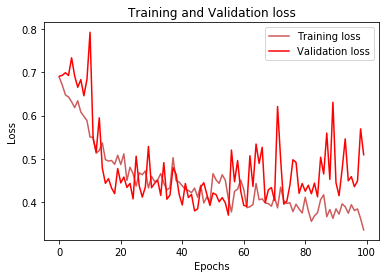

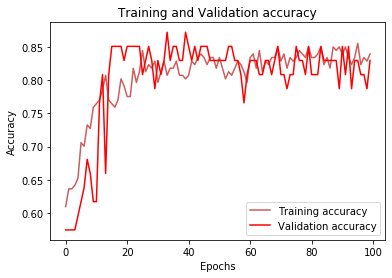

In [40]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

In [42]:
dnn_3_acc = accuracy_score(y_pred, y_test)
dnn_3_prec = precision_score(y_pred, y_test,average='weighted')
dnn_3_rec = recall_score(y_pred, y_test,average='weighted')
dnn_3_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_3_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_3_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [77]:
storeResults1('DNN - 3 Layers',dnn_3_acc,dnn_3_prec,dnn_3_rec,dnn_3_f1,dnn_3_spec,dnn_3_sens)

# 4 Layers

In [43]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 8s 22ms/step - loss: 0.6929 - accuracy: 0.5620 - val_loss: 0.6897 - val_accuracy: 0.5745
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.6046 - val_loss: 0.7446 - val_accuracy: 0.5745
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6164 - accuracy: 0.6538 - val_loss: 0.6898 - val_accuracy: 0.5745
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6170 - accuracy: 0.6434 - val_loss: 0.6871 - val_accuracy: 0.5745
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5993 - accuracy: 0.6767 - val_loss: 0.6846 - val_accuracy: 0.5745
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6340 - accuracy: 0.6507 - val_loss: 0.7021 - val_accuracy: 0.5745
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.6050 - val_loss: 0.7533 - val_accuracy: 0.5957
Epoch 8/100


Epoch 59/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.8716 - val_loss: 0.4523 - val_accuracy: 0.8298
Epoch 60/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.7857 - val_loss: 0.7229 - val_accuracy: 0.8085
Epoch 61/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4432 - accuracy: 0.7775 - val_loss: 0.4147 - val_accuracy: 0.8298
Epoch 62/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3815 - accuracy: 0.8613 - val_loss: 0.5602 - val_accuracy: 0.8085
Epoch 63/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.8114 - val_loss: 0.4515 - val_accuracy: 0.8298
Epoch 64/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8313 - val_loss: 0.5698 - val_accuracy: 0.7872
Epoch 65/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.8398 - val_loss: 0.4904 - val_accuracy: 0.8085
Epoch 

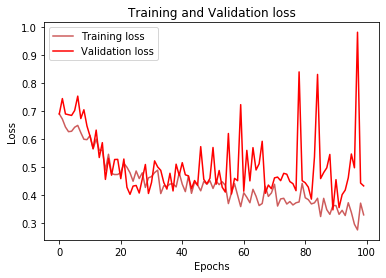

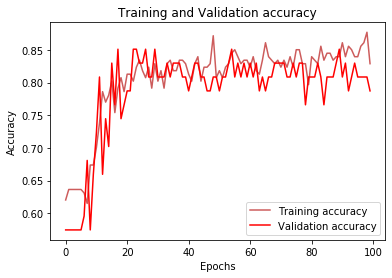

In [45]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_4_acc = accuracy_score(y_pred, y_test)
dnn_4_prec = precision_score(y_pred, y_test,average='weighted')
dnn_4_rec = recall_score(y_pred, y_test,average='weighted')
dnn_4_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_4_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_4_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [78]:
storeResults1('DNN - 4 Layers',dnn_4_acc,dnn_4_prec,dnn_4_rec,dnn_4_f1,dnn_4_spec,dnn_4_sens)

# 5 Layers

In [47]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 8s 21ms/step - loss: 0.6918 - accuracy: 0.6040 - val_loss: 0.6893 - val_accuracy: 0.5745
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.6279 - val_loss: 0.6978 - val_accuracy: 0.5745
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6348 - val_loss: 0.6932 - val_accuracy: 0.5745
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.6469 - val_loss: 0.6868 - val_accuracy: 0.5745
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.6525 - val_loss: 0.6973 - val_accuracy: 0.5745
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6388 - val_loss: 0.6871 - val_accuracy: 0.5745
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6176 - accuracy: 0.6753 - val_loss: 0.7036 - val_accuracy: 0.5745
Epoch 8/100


94/94 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8746 - val_loss: 0.4523 - val_accuracy: 0.8298
Epoch 59/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.8324 - val_loss: 0.5327 - val_accuracy: 0.8298
Epoch 60/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3756 - accuracy: 0.8447 - val_loss: 0.4965 - val_accuracy: 0.8298
Epoch 61/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.7953 - val_loss: 0.4468 - val_accuracy: 0.8298
Epoch 62/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.7777 - val_loss: 0.5970 - val_accuracy: 0.7660
Epoch 63/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7922 - val_loss: 0.5112 - val_accuracy: 0.8298
Epoch 64/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8411 - val_loss: 0.4385 - val_accuracy: 0.8298
Epoch 65/100
94/94 

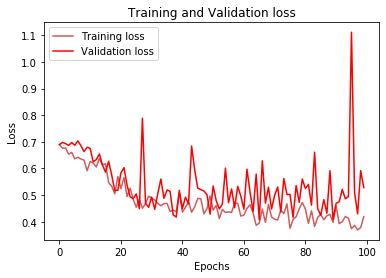

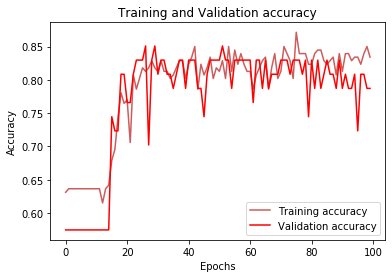

In [49]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_5_acc = accuracy_score(y_pred, y_test)
dnn_5_prec = precision_score(y_pred, y_test,average='weighted')
dnn_5_rec = recall_score(y_pred, y_test,average='weighted')
dnn_5_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_5_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_5_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [79]:
storeResults1('DNN - 5 Layers',dnn_5_acc,dnn_5_prec,dnn_5_rec,dnn_5_f1,dnn_5_spec,dnn_5_sens)

# 6 Layers

In [51]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 9s 22ms/step - loss: 0.6924 - accuracy: 0.5505 - val_loss: 0.6903 - val_accuracy: 0.5745
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.6115 - val_loss: 0.6878 - val_accuracy: 0.5745
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.6608 - val_loss: 0.6921 - val_accuracy: 0.5745
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5611 - val_loss: 0.7254 - val_accuracy: 0.5745
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6540 - val_loss: 0.6852 - val_accuracy: 0.5745
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.5919 - val_loss: 0.6853 - val_accuracy: 0.5745
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6317 - val_loss: 0.7341 - val_accuracy: 0.5745
Epoch 8/100


Epoch 59/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8468 - val_loss: 0.4545 - val_accuracy: 0.8085
Epoch 60/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.8013 - val_loss: 0.4952 - val_accuracy: 0.7872
Epoch 61/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.8252 - val_loss: 0.4627 - val_accuracy: 0.8511
Epoch 62/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.7659 - val_loss: 0.4210 - val_accuracy: 0.8298
Epoch 63/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8132 - val_loss: 0.4243 - val_accuracy: 0.8511
Epoch 64/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4512 - accuracy: 0.8197 - val_loss: 0.4156 - val_accuracy: 0.8298
Epoch 65/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8479 - val_loss: 0.4518 - val_accuracy: 0.8085
Epoch 

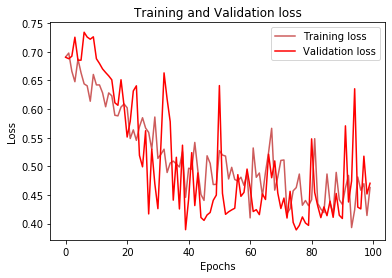

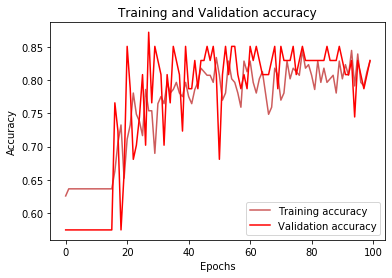

In [53]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_6_acc = accuracy_score(y_pred, y_test)
dnn_6_prec = precision_score(y_pred, y_test,average='weighted')
dnn_6_rec = recall_score(y_pred, y_test,average='weighted')
dnn_6_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_6_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_6_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [80]:
storeResults1('DNN - 6 Layers',dnn_6_acc,dnn_6_prec,dnn_6_rec,dnn_6_f1,dnn_6_spec,dnn_6_sens)

# 7 Layers

In [55]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 7s 15ms/step - loss: 0.6919 - accuracy: 0.6392 - val_loss: 0.6899 - val_accuracy: 0.5745
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6416 - val_loss: 0.6954 - val_accuracy: 0.5745
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.6500 - val_loss: 0.6881 - val_accuracy: 0.5745
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6059 - val_loss: 0.6883 - val_accuracy: 0.5745
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6515 - val_loss: 0.6848 - val_accuracy: 0.5745
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5975 - val_loss: 0.6843 - val_accuracy: 0.5745
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.5985 - val_loss: 0.6852 - val_accuracy: 0.5745
Epoch 8/100


Epoch 59/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.6659 - val_loss: 0.5481 - val_accuracy: 0.8511
Epoch 60/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7873 - val_loss: 0.5448 - val_accuracy: 0.8511
Epoch 61/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7281 - val_loss: 0.6153 - val_accuracy: 0.8298
Epoch 62/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7410 - val_loss: 0.5711 - val_accuracy: 0.8298
Epoch 63/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7153 - val_loss: 0.6270 - val_accuracy: 0.6596
Epoch 64/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7159 - val_loss: 0.5466 - val_accuracy: 0.8298
Epoch 65/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.8380 - val_loss: 0.5503 - val_accuracy: 0.8298
Epoch 

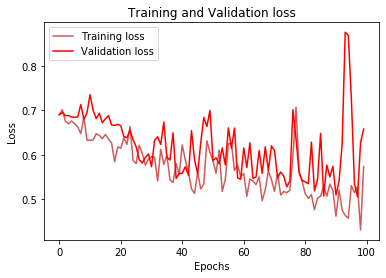

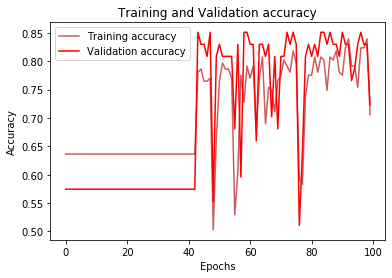

In [57]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_7_acc = accuracy_score(y_pred, y_test)
dnn_7_prec = precision_score(y_pred, y_test,average='weighted')
dnn_7_rec = recall_score(y_pred, y_test,average='weighted')
dnn_7_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_7_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_7_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [81]:
storeResults1('DNN - 7 Layers',dnn_7_acc,dnn_7_prec,dnn_7_rec,dnn_7_f1,dnn_7_spec,dnn_7_sens)

# 8 Layers

In [59]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 6s 15ms/step - loss: 0.6917 - accuracy: 0.6816 - val_loss: 0.6905 - val_accuracy: 0.5745
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.6484 - val_loss: 0.6883 - val_accuracy: 0.5745
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5467 - val_loss: 0.6863 - val_accuracy: 0.5745
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5597 - val_loss: 0.6847 - val_accuracy: 0.5745
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6333 - val_loss: 0.6836 - val_accuracy: 0.5745
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6776 - val_loss: 0.6828 - val_accuracy: 0.5745
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.7080 - val_loss: 0.7010 - val_accuracy: 0.5745
Epoch 8/100


Epoch 59/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6197 - val_loss: 0.6456 - val_accuracy: 0.5745
Epoch 60/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.6868 - val_loss: 0.6281 - val_accuracy: 0.5745
Epoch 61/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.5997 - val_loss: 0.6225 - val_accuracy: 0.5745
Epoch 62/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.5944 - val_loss: 0.5997 - val_accuracy: 0.5745
Epoch 63/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.6668 - val_loss: 0.5762 - val_accuracy: 0.5745
Epoch 64/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.6247 - val_loss: 0.5687 - val_accuracy: 0.5745
Epoch 65/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.6918 - val_loss: 0.6377 - val_accuracy: 0.5745
Epoch 

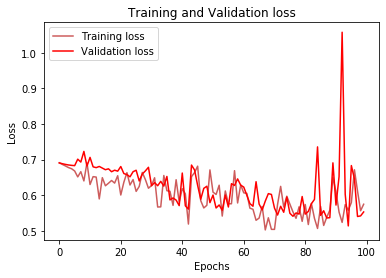

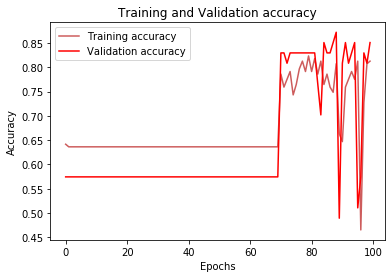

In [61]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_8_acc = accuracy_score(y_pred, y_test)
dnn_8_prec = precision_score(y_pred, y_test,average='weighted')
dnn_8_rec = recall_score(y_pred, y_test,average='weighted')
dnn_8_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_8_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_8_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [82]:
storeResults1('DNN - 8 Layers',dnn_8_acc,dnn_8_prec,dnn_8_rec,dnn_8_f1,dnn_8_spec,dnn_8_sens)

# 9 Layers

In [63]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [64]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 7s 17ms/step - loss: 0.6921 - accuracy: 0.6403 - val_loss: 0.6907 - val_accuracy: 0.5745
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.6646 - val_loss: 0.6883 - val_accuracy: 0.5745
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.6289 - val_loss: 0.6858 - val_accuracy: 0.5745
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6223 - val_loss: 0.6839 - val_accuracy: 0.5745
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6735 - accuracy: 0.6404 - val_loss: 0.6828 - val_accuracy: 0.5745
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6235 - val_loss: 0.6822 - val_accuracy: 0.5745
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5932 - val_loss: 0.6821 - val_accuracy: 0.5745
Epoch 8/100


94/94 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.6514 - val_loss: 0.6692 - val_accuracy: 0.5745
Epoch 59/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6255 - val_loss: 0.6445 - val_accuracy: 0.5745
Epoch 60/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.6411 - val_loss: 0.6436 - val_accuracy: 0.5745
Epoch 61/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.6750 - val_loss: 0.6338 - val_accuracy: 0.5745
Epoch 62/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6294 - val_loss: 0.6397 - val_accuracy: 0.5745
Epoch 63/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.6538 - val_loss: 0.6253 - val_accuracy: 0.5745
Epoch 64/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6369 - val_loss: 0.5901 - val_accuracy: 0.5745
Epoch 65/100
94/94 

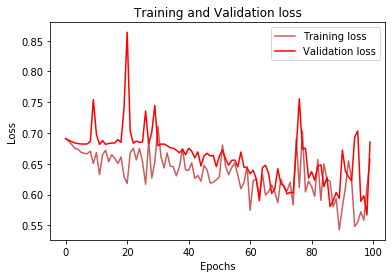

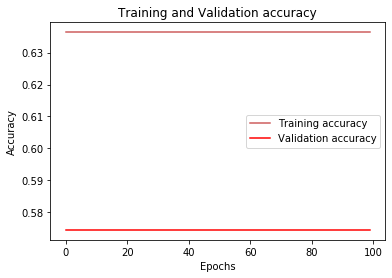

In [65]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_9_acc = accuracy_score(y_pred, y_test)
dnn_9_prec = precision_score(y_pred, y_test,average='weighted')
dnn_9_rec = recall_score(y_pred, y_test,average='weighted')
dnn_9_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_9_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_9_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [83]:
storeResults1('DNN - 9 Layers',dnn_9_acc,dnn_9_prec,dnn_9_rec,dnn_9_f1,dnn_9_spec,dnn_9_sens)

# Comparison

In [104]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'Specificity' : spec,
                       'Sensitivity' : sens
                      }) 

In [105]:
result

,ML Model,Accuracy,Precision,Recall,F1_score,Specificity,Sensitivity
0,KNN,0.741,0.783,0.741,0.753,0.724,0.741
1,LinearSVC,0.704,0.846,0.704,0.745,0.742,0.704
2,Guassian Process,0.778,0.778,0.778,0.778,0.746,0.778
3,Decision Tree,0.778,0.807,0.778,0.774,0.788,0.778
4,Naive Bayes,0.815,0.814,0.815,0.813,0.787,0.815
5,QDA,0.815,0.822,0.815,0.817,0.796,0.815
6,AdaBoost,0.852,0.870,0.852,0.856,0.865,0.852
7,Bagging,0.778,0.778,0.778,0.778,0.746,0.778
8,Boosting,0.852,0.858,0.852,0.850,0.831,0.852
9,Stacking Classifier,0.778,0.779,0.778,0.775,0.755,0.778


In [106]:
#creating dataframe
result1 = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                       'Precision': precision1,
                       'Recall'   : recall1, 
                       'F1_score' : f1score1,
                       'Specificity' : spec1,
                       'Sensitivity' : sens1
                      }) 

In [107]:
result1

,ML Model,Accuracy,Precision,Recall,F1_score,Specificity,Sensitivity
0,DNN - 3 Layers,0.815,0.822,0.815,0.817,0.796,0.815
1,DNN - 4 Layers,0.778,0.780,0.778,0.775,0.756,0.778
2,DNN - 5 Layers,0.778,0.778,0.778,0.778,0.746,0.778
3,DNN - 6 Layers,0.778,0.778,0.778,0.778,0.746,0.778
4,DNN - 7 Layers,0.593,0.755,0.593,0.603,0.756,0.593
5,DNN - 8 Layers,0.815,0.814,0.815,0.813,0.787,0.815
6,DNN - 9 Layers,0.370,1.000,0.370,0.541,0.000,0.370


# Graph

# ML

In [108]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

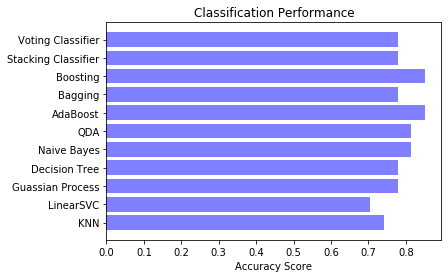

In [109]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

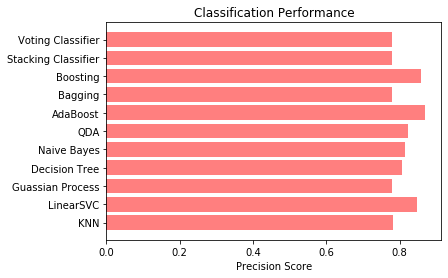

In [110]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

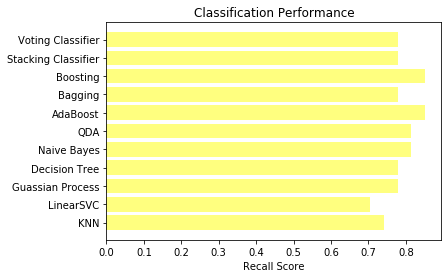

In [111]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

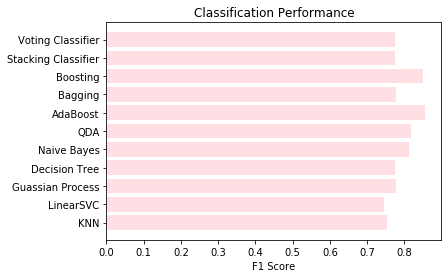

In [112]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

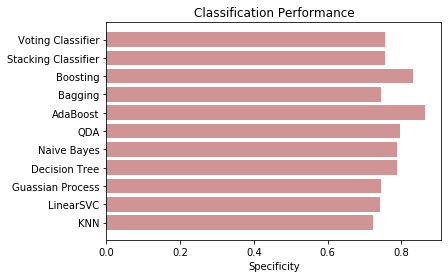

In [113]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

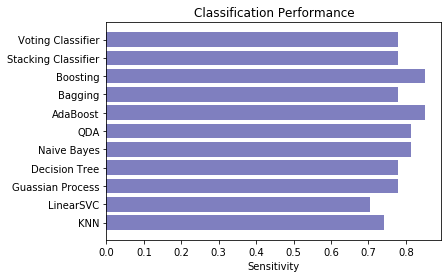

In [114]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()

# DL

In [95]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

# Accuracy

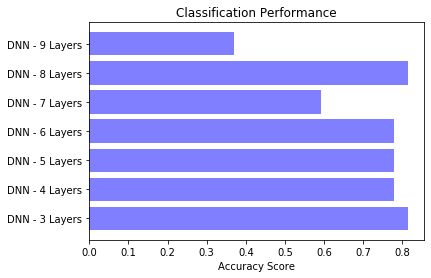

In [96]:
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

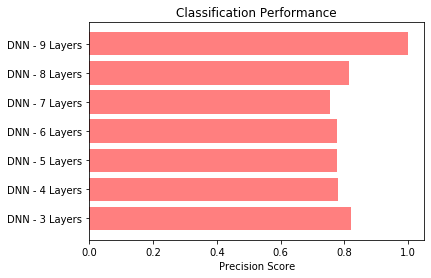

In [97]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

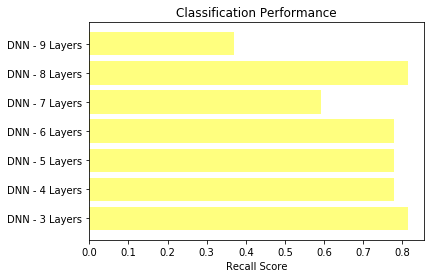

In [98]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

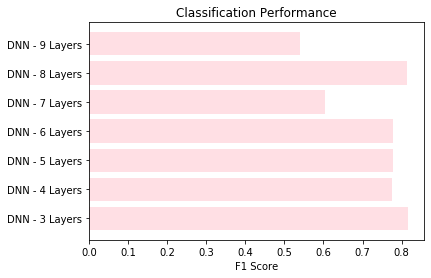

In [99]:
plt2.barh(y_pos, f1score1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

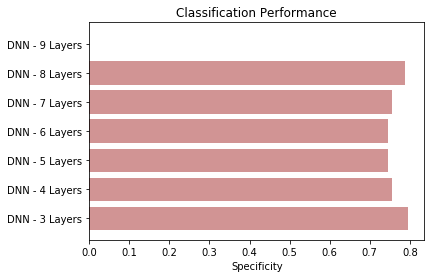

In [100]:
plt2.barh(y_pos, spec1, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

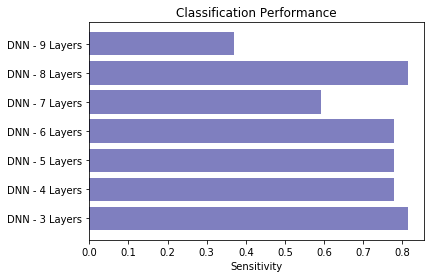

In [101]:
plt2.barh(y_pos, sens1, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()